# Analytics Water Consumer Data

In [2]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.Installation_zone = df_train.Installation_zone.str.replace('Installation_zone ', '').astype(int)

df_train

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,1
1,2013,1,industrial,5,BECS02817768252637,2
2,2013,1,domestic,6,VRFW65577141436242,2
3,2013,1,domestic,1,QLLI18662653137621,2
4,2013,1,domestic,13,HYUO61823402850645,2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,2
329971,2020,12,rural domestic,0,RVZG94535208799772,47
329972,2020,12,rural domestic,0,DWGA69725679861554,7
329973,2020,12,rural domestic,0,VJDC45865594518045,32


In [ ]:
df_competition = pd.read_csv('competition.csv')
df_competition

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3
...,...,...,...,...,...
18274,2020,12,0,AEQZ48426066915128,Installation_zone 26
18275,2020,12,0,BMPP69449933761787,Installation_zone 17
18276,2020,12,0,XFJB02101108755437,Installation_zone 44
18277,2020,12,0,YRTP25456715504279,Installation_zone 2


## 1. Analytics

In [ ]:
# Amount by each Consumer Type
df_train.Consumer_type.value_counts()

domestic               236167
rural domestic          63086
industrial              21057
rural commercial         5541
construction             2235
low income families       999
rural expansion           890
Name: Consumer_type, dtype: int64

In [ ]:
# Consumer Type amount by the Installation Zone
pd.crosstab(df_train.Installation_zone, df_train.Consumer_type)

Consumer_type,construction,domestic,industrial,low income families,rural commercial,rural domestic,rural expansion
Installation_zone,,,,,,,
Installation_zone 1,230,73358,3511,322,51,0,0
Installation_zone 10,19,0,0,2,0,4157,59
Installation_zone 11,13,0,0,0,0,990,13
Installation_zone 12,11,0,10,0,0,1326,13
Installation_zone 13,9,0,0,0,0,1688,0
Installation_zone 14,6,0,0,0,0,1080,56
Installation_zone 15,0,0,0,0,0,225,0
Installation_zone 16,6,0,41,0,8,2774,0
Installation_zone 17,0,0,0,0,0,1895,51


In [ ]:
# Consumption mean by Consumer Type
df_train.groupby(df_train.Consumer_type).Consumption.mean()

Consumer_type
construction            7.730201
domestic                6.810613
industrial             11.294819
low income families     9.031031
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: Consumption, dtype: float64

In [ ]:
# Records by Month by Year
pd.crosstab(df_train.Year,df_train.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2013,4081,3952,3915,3834,3849,3755,3764,3762,3783,3736,3790,3638
2014,4093,3903,3919,3841,3827,3757,3771,3761,3824,3743,3813,3641
2016,4144,3897,3896,3864,3862,3773,3797,3761,3803,3778,3814,3796
2017,4190,3910,3930,3894,3863,3763,3822,3804,3817,3809,3843,3987
2018,4280,4002,3940,3903,3882,3787,3847,3829,3844,3838,3812,4599
2019,4300,4025,3979,3930,3924,3807,3826,3833,3852,3797,3822,5040
2020,4295,3998,3978,3946,3950,3837,3852,3898,3878,3886,3788,6402


In [ ]:
# Consumers with more than one Consumer Type
df_consumer = df_train.groupby(df_train.Consumer_number).agg({'Consumer_type':pd.Series.nunique}).sort_values(by='Consumer_type', ascending=False)
df_consumer.loc[df_consumer.Consumer_type>1]

,Consumer_type
Consumer_number,
ZENE18749022668446,3
IDFI76922627259896,2
RMOQ19546123782419,2
GGAN74801761769979,2
XGZH92843462240172,2
...,...
MAPI82703206584269,2
LESR81245049449880,2
XPIZ50071980679028,2


In [ ]:
df_train.loc[df_train.Consumer_number=='ZENE18749022668446']

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
228639,2018,12,industrial,7,ZENE18749022668446,Installation_zone 1
233258,2019,1,low income families,3,ZENE18749022668446,Installation_zone 1
253350,2019,6,low income families,9,ZENE18749022668446,Installation_zone 1
257237,2019,7,low income families,4,ZENE18749022668446,Installation_zone 1
285627,2020,2,domestic,6,ZENE18749022668446,Installation_zone 1
289675,2020,3,domestic,9,ZENE18749022668446,Installation_zone 1
301518,2020,6,domestic,10,ZENE18749022668446,Installation_zone 1
313216,2020,9,domestic,9,ZENE18749022668446,Installation_zone 1
320942,2020,11,domestic,7,ZENE18749022668446,Installation_zone 1
324646,2020,12,domestic,7,ZENE18749022668446,Installation_zone 1


## 2. Training Tests

### 2.1. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 88.59%
Confusion Matrix:
 [[    0   566     1     0     0   117     0]
 [    0 70787     4     0     0     9     0]
 [    0  6283    32     0     0    51     0]
 [    0   291     0     0     0     5     0]
 [    0  1135     1     0     0   521     0]
 [    0  2031     4     0     0 16875     0]
 [    0    41     0     0     0   239     0]]
Classification Report:
                      precision    recall  f1-score   support

       construction       0.00      0.00      0.00       684
           domestic       0.87      1.00      0.93     70800
         industrial       0.76      0.01      0.01      6366
low income families       0.00      0.00      0.00       296
   rural commercial       0.00      0.00      0.00      1657
     rural domestic       0.95      0.89      0.92     18910
    rural expansion       0.00      0.00      0.00       280

           accuracy                           0.89     98993
          macro avg       0.37      0.27      0.27     98993
       weigh

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

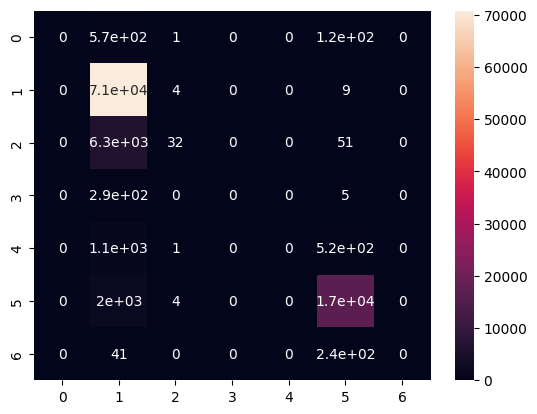

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sn

# Load the data
dataset = pd.read_csv('train.csv')
dataset.Installation_zone = dataset.Installation_zone.str.replace('Installation_zone ', '').astype(int)

# Split dataset into features (X) and the target variable (y)
x = dataset.drop(['Consumer_type', 'Consumer_number'], axis=1)
y = dataset['Consumer_type']

# Split the data into a training set and testing set (e.g., 70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test

# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train,y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Confusion Matrix:\n', confusion)
print(f'Classification Report:\n', classification_rep)

sn.heatmap(confusion, annot=True)

### 2.2.